### Traditional Graph ML

In [ ]:
!pip install grakel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00


In [ ]:
import itertools
import grakel
import random
import time
from collections import defaultdict
from typing import Callable, Dict, List, Optional, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
def seed_everything(seed: Optional[int] = None) -> None:
  random.seed(seed)
  np.random.seed(seed)

In [ ]:
#build a function for graph display
def features_example(
    feature_extraction_fun: Callable[[nx.Graph], Dict[Union[str, Tuple[str, str]], Union[int, float]]],
    fig_size: Tuple[int, int] = (6, 3),
    node_color: str = "tab:orange",
    node_size: int = 1000,
    width: int = 2,
    seed: Optional[int] = None,
) -> None:
    edge_list = [("A", "C"), ("B", "C"), ("B", "D"), ("C", "D"), ("D", "E"), ("D", "H"), ("E", "F"), ("E", "G")]
    G = nx.Graph(edge_list)
    name = feature_extraction_fun.__name__.replace("_", " ").capitalize()
    features = feature_extraction_fun(G)
    pos = nx.spring_layout(G, seed=seed)

    plt.figure(figsize=fig_size)
    nx.draw(G, pos=pos, node_color=node_color, node_size=node_size, width=width, with_labels=True)
    plt.show()

    print(f"\n{name} values:")
    for key, value in sorted(features.items(), key=lambda item: item[0]):
        print(f"- {key}: {value:.2f}")


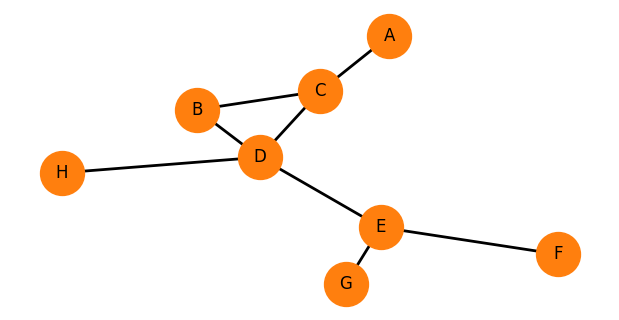


Node degree values:
- A: 1.00
- B: 2.00
- C: 3.00
- D: 4.00
- E: 3.00
- F: 1.00
- G: 1.00
- H: 1.00


In [ ]:
#Node degree
def node_degree(G:nx.Graph) -> Dict[str, int]:
  return dict(G.degree())

features_example(node_degree, seed=42)

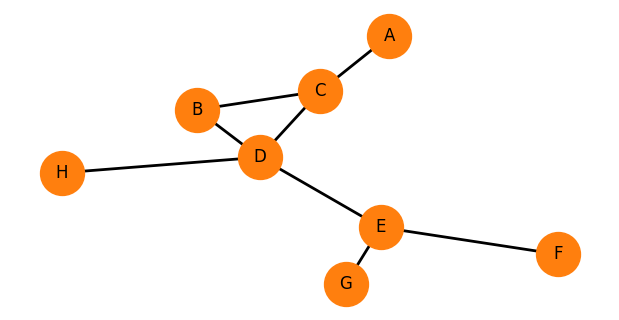


Eigenvector centrality values:
- A: 0.19
- B: 0.42
- C: 0.48
- D: 0.59
- E: 0.34
- F: 0.14
- G: 0.14
- H: 0.23


In [ ]:
#Eigenvector centrality
features_example(nx.eigenvector_centrality, seed=42)

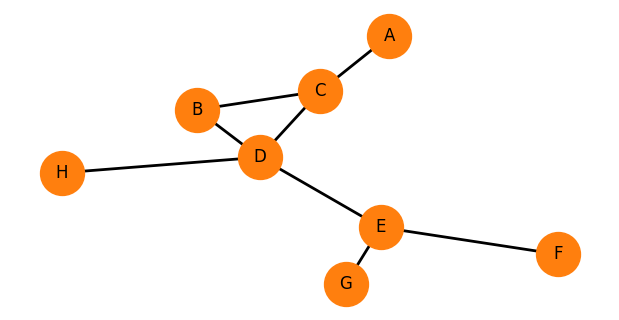


Shortest path length values:
- ('A', 'B'): 2.00
- ('A', 'C'): 1.00
- ('A', 'D'): 2.00
- ('A', 'E'): 3.00
- ('A', 'F'): 4.00
- ('A', 'G'): 4.00
- ('A', 'H'): 3.00
- ('B', 'D'): 1.00
- ('B', 'E'): 2.00
- ('B', 'F'): 3.00
- ('B', 'G'): 3.00
- ('B', 'H'): 2.00
- ('C', 'B'): 1.00
- ('C', 'D'): 1.00
- ('C', 'E'): 2.00
- ('C', 'F'): 3.00
- ('C', 'G'): 3.00
- ('C', 'H'): 2.00
- ('D', 'E'): 1.00
- ('D', 'F'): 2.00
- ('D', 'G'): 2.00
- ('D', 'H'): 1.00
- ('E', 'F'): 1.00
- ('E', 'G'): 1.00
- ('E', 'H'): 2.00
- ('F', 'G'): 2.00
- ('H', 'F'): 3.00
- ('H', 'G'): 3.00


In [ ]:
#shortest-path-length
def shortest_path_length(G:nx.Graph):
  out = {}
  for node_pair in itertools.combinations(G.nodes(), 2):
    out[node_pair] = nx.shortest_path_length(G, *node_pair) #unpark tuple
  return out

features_example(shortest_path_length, seed=42)

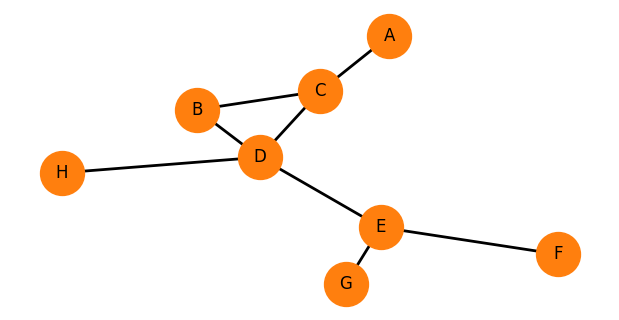


Num common neighbors values:
- ('A', 'B'): 1.00
- ('A', 'C'): 0.00
- ('A', 'D'): 1.00
- ('A', 'E'): 0.00
- ('A', 'F'): 0.00
- ('A', 'G'): 0.00
- ('A', 'H'): 0.00
- ('B', 'D'): 1.00
- ('B', 'E'): 1.00
- ('B', 'F'): 0.00
- ('B', 'G'): 0.00
- ('B', 'H'): 1.00
- ('C', 'B'): 1.00
- ('C', 'D'): 1.00
- ('C', 'E'): 1.00
- ('C', 'F'): 0.00
- ('C', 'G'): 0.00
- ('C', 'H'): 1.00
- ('D', 'E'): 0.00
- ('D', 'F'): 1.00
- ('D', 'G'): 1.00
- ('D', 'H'): 0.00
- ('E', 'F'): 0.00
- ('E', 'G'): 0.00
- ('E', 'H'): 1.00
- ('F', 'G'): 1.00
- ('H', 'F'): 0.00
- ('H', 'G'): 0.00


In [ ]:
#Local Neighborhood Overlap (common neighbors)
def num_common_neighbors(G):
  return {edge: len(list(nx.common_neighbors(G, *edge))) for edge in itertools.combinations(G.nodes, 2)}

features_example(num_common_neighbors, seed=42)

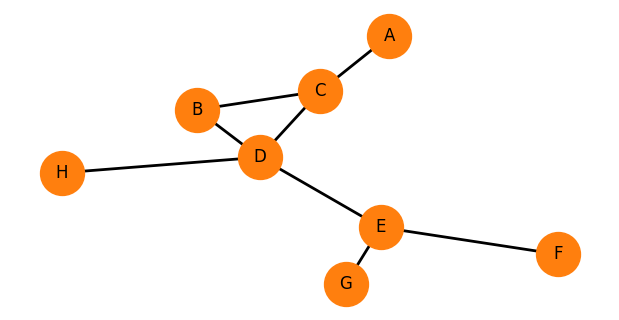


Katz index (beta=0.3) values:
- ('A', 'B'): 0.23
- ('A', 'C'): 0.50
- ('A', 'D'): 0.27
- ('A', 'E'): 0.10
- ('A', 'F'): 0.03
- ('A', 'G'): 0.03
- ('A', 'H'): 0.08
- ('B', 'D'): 0.84
- ('B', 'E'): 0.31
- ('B', 'F'): 0.09
- ('B', 'G'): 0.09
- ('B', 'H'): 0.25
- ('C', 'B'): 0.77
- ('C', 'D'): 0.91
- ('C', 'E'): 0.33
- ('C', 'F'): 0.10
- ('C', 'G'): 0.10
- ('C', 'H'): 0.27
- ('D', 'E'): 0.70
- ('D', 'F'): 0.21
- ('D', 'G'): 0.21
- ('D', 'H'): 0.57
- ('E', 'F'): 0.44
- ('E', 'G'): 0.44
- ('E', 'H'): 0.21
- ('F', 'G'): 0.13
- ('H', 'F'): 0.06
- ('H', 'G'): 0.06


In [ ]:
#Global Neighborhood overlap (Katz)
def get_katz_index_matrix(G, beta):
  A = nx.adjacency_matrix(G).todense()
  X = beta * A
  max_eigenval = np.linalg.eigvals(X).max()
  if max_eigenval >= 1.0:
    raise ValueError(f'Expected eigenvalue < 1.0, got {max_eigenval}.')
  I = np.eye(X.shape[0])  #identity matrix
  S = np.linalg.inv(I - X) - I
  return S  #katz matrix

def katz_index_beta_03(G):
  S = get_katz_index_matrix(G, 0.3)
  nodes = list(G.nodes)
  ki = {}
  for node_pair in itertools.combinations(nodes, 2):
    row_idx = nodes.index(node_pair[0])
    col_idx = nodes.index(node_pair[1])
    ki[node_pair] = S[row_idx, col_idx]
  return ki

katz_index_beta_03.__name__ = "katz_index_(beta=0.3)"  #remeber we did .replace('_', " ")
features_example(katz_index_beta_03, seed=42)




In [ ]:
#Graph plot
def plot_graph(
    G: nx.Graph,
    root: str,
    graphlet_nodes: set = set(),
    node_size: int = 1000,
    width: int = 2,
    seed: Optional[int] = None,
) -> None:
    colors = {node: "tab:gray" for node in graphlet_nodes}
    colors[root] = "tab:red"
    node_color = [colors.get(node, "white") for node in G.nodes()]
    edgecolors = ["none" if node == root else "black" for node in G.nodes()]
    labels = {node: node if node == root else "" for node in G.nodes()}
    pos = nx.spring_layout(G, seed=seed)
    nx.draw(G, pos=pos, node_color=node_color, edgecolors=edgecolors, labels=labels, node_size=node_size, width=width)


def add_is_root_attr(G: nx.Graph, root: str) -> nx.Graph:
    is_root = {node: {"is_root": node == root} for node in G.nodes}
    nx.set_node_attributes(G, is_root)


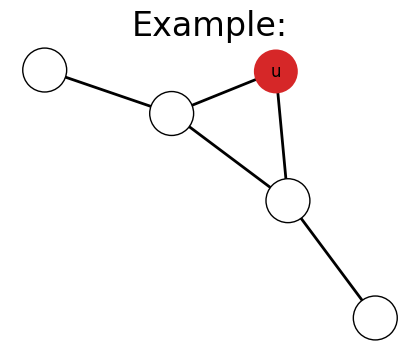

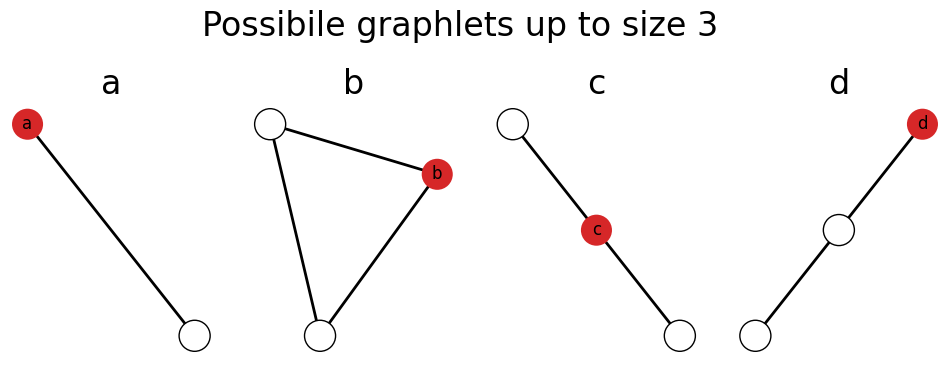

In [ ]:
#Graplet of size 3
edge_list = [("u", "B"), ("u", "C"), ("B", "C"), ("B", "D"), ("C", "E")]
G = nx.Graph(edge_list)
add_is_root_attr(G, "u")
possible_graphlets_up_to_size_3 = {
    "a": nx.Graph([("a", "B")]),
    "b": nx.Graph([("b", "B"), ("b", "C"), ("B", "C")]),
    "c": nx.Graph([("c", "B"), ("c", "C")]),
    "d": nx.Graph([("B", "d"), ("B", "C")]),
}
for root, possible_graphlet in possible_graphlets_up_to_size_3.items():
    add_is_root_attr(possible_graphlet, root)


plt.figure(figsize=(4, 3))
plot_graph(G, "u")
plt.title("Example:", fontsize=24)
plt.show()

plt.figure(figsize=(12, 4))

for idx, (root, graphlet) in enumerate(possible_graphlets_up_to_size_3.items(), 1):
    plt.subplot(1, 4, idx)
    plt.title(root, fontsize=24)
    plot_graph(graphlet, root, node_size=500)

plt.suptitle("Possibile graphlets up to size 3", fontsize=24)
plt.subplots_adjust(top=0.75)
plt.show()

In [ ]:
#Graph Degree Vector
def _node_match(n1: Dict[str, bool], n2: Dict[str, bool]) -> bool:
    return n1["is_root"] and n2["is_root"] or not n1["is_root"] and not n2["is_root"]


def get_graphlet_instances(
    G: nx.Graph, node: str, possible_graphlets: Dict[str, nx.Graph], max_size: int = 3
) -> Dict[str, List[nx.Graph]]:
    graphlet_instances = defaultdict(list) #regular dict without keyerror. gives [] if keyerror
    for size in range(2, max_size + 1):
        for combination in itertools.combinations(G.nodes, size):
            if node in combination:
                subgraph = nx.subgraph(G, combination)
                if nx.is_connected(subgraph):
                    for key, graphlet in possible_graphlets.items():
                        if nx.is_isomorphic(subgraph, graphlet, node_match=_node_match):
                            graphlet_instances[key].append(subgraph)


    return dict(graphlet_instances)  #remember to convert to regular dict

def get_graph_degree_vector(G, root, possible_graphlets):
  graphlet_instances = get_graphlet_instances(G, "u", possible_graphlets)
  out = []
  for key in sorted(possible_graphlets.keys()): #smallest to largest
    out.append(len(graphlet_instances.get(key, [])))
  return out

gdv = get_graph_degree_vector(G, "u", possible_graphlets_up_to_size_3)

print(f"GDV of a node u: {gdv}")


GDV of a node u: [2, 1, 0, 2]


#Graph Level Features
* kernel method
* Weisfeiler-Lehman Kernel

In [ ]:
import grakel
from grakel.kernels import GraphletSampling, WeisfeilerLehman
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

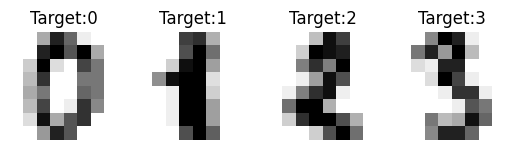

In [ ]:
digits = load_digits()
images = digits.images
y = digits.target

for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title(f"Target:{y[i]}")
  plt.axis("off")

In [ ]:
#convert images to graphs
def images_to_graphs(images: np.ndarray) -> List[grakel.Graph]:
  num_images, height, width = images.shape
  graphs = []
  edges = []
  edge_labels = {}
  for row_idx in range(height):
    for col_idx in range(width):
      if col_idx < width - 1:
        edge = (row_idx * height + col_idx, row_idx * height + col_idx + 1)
        edges.append(edge)
        edge_labels[edge] = 1

      if row_idx < height - 1:
        edge = (row_idx * height + col_idx, (row_idx + 1) * height + col_idx)
        edges.append(edge)
        edge_labels[edge] = 2

  for image_idx in range(num_images):
    node_labels = {}
    for row_idx in range(height):
      for col_idx in range(height):
        node_labels[row_idx * height + col_idx] = int(images[image_idx, row_idx, col_idx]/4)
    graphs.append(grakel.Graph(edges, node_labels=node_labels, edge_labels=edge_labels))
  return graphs

In [ ]:
graphs = images_to_graphs(images)

graphs_train, graphs_test = graphs[:1000], graphs[1000:1100]
y_train, y_test = y[:1000], y[1000:1100]

In [ ]:
#Graphlet kernel
gk = GraphletSampling(k=3)
k_train = gk.fit_transform(graphs_train)
k_test = gk.transform(graphs_test)

clf = SVC(kernel="precomputed")
clf.fit(k_train, y_train)

y_pred = clf.predict(k_test)
print(f"classification accuracy: {accuracy_score(y_test, y_pred):.2f}")


classification accuracy: 0.09


In [ ]:
#Weisfeiler-Lehman Kernel
gk = WeisfeilerLehman(n_iter=5)
k_train = gk.fit_transform(graphs_train)
k_test = gk.transform(graphs_test)

clf = SVC(kernel="precomputed")
clf.fit(k_train, y_train)

y_pred = clf.predict(k_test)

print(f"classification accuracy: {accuracy_score(y_test, y_pred):.2f}")

classification accuracy: 0.83


## Page Rank

In [ ]:
import random
from typing import Optional

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [ ]:
#Example flow equation
def get_stochastic_matrix(G: nx.Graph) -> np.ndarray:
  nodes = list(G.nodes())
  num_nodes = len(nodes)
  M = np.zeros((num_nodes, num_nodes))
  for j, node_j in enumerate(nodes):
    in_edges = G.in_edges(node_j)
    for in_edge in G.in_edges(node_j):
      node_i = in_edge[0]
      i = nodes.index(node_i)
      M[j, i] += 1.0 / G.out_degree(node_i)
  return M

# Or, more concise but slower:

# def get_stochastic_adjacency_matrix(G: nx.Graph) -> np.ndarray:
#    A = nx.adjacency_matrix(G).todense().astype(float)
#    out_degrees = np.array([degree[1] for degree in G.out_degree()])
#    return np.divide(A, out_degrees, out=np.zeros_like(A), where=out_degrees != 0)

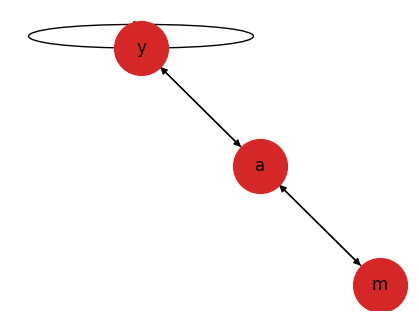

[[0.5 0.5 0. ]
 [0.5 0.  1. ]
 [0.  0.5 0. ]]


In [ ]:
edge_list = [("y", "a"), ("y", "y"), ("a", "m"), ("a", "y"), ("m", "a")]
G = nx.DiGraph(edge_list)
M = get_stochastic_matrix(G)

plt.figure(figsize=(4, 3))
nx.draw(G, node_color="tab:red", node_size=1500, with_labels=True)
plt.show()

print(M)

In [ ]:
#pagerank example
def pagerank_example(
    personalization: Optional[dict] = None,
    spring_layout_k = 5.0,
    label_rank_threshold = 0.02,
    cmap_name = "viridis",
    node_size_factor = 2e4,
    width = 1.5,
    font_size = 16,
    seed = 42
):

    edge_list = [
        ("B", "C"),
        ("C", "B"),
        ("D", "A"),
        ("D", "B"),
        ("E", "B"),
        ("E", "D"),
        ("E", "F"),
        ("F", "B"),
        ("F", "E"),
        ("G", "B"),
        ("G", "E"),
        ("H", "B"),
        ("H", "E"),
        ("I", "B"),
        ("I", "E"),
        ("J", "E"),
        ("K", "E"),
    ]
    G = nx.DiGraph(edge_list)
    ranks = nx.pagerank(G, personalization=personalization)
    max_rank = max(ranks.values())
    node_sizes = [max(100.0, node_size_factor * rank/max_rank) for node, rank in ranks.items()]
    cmap = plt.get_cmap(cmap_name)
    node_colors = [cmap(rank/max_rank) for node, rank in ranks.items()]
    node_lables = {
        node: f"{node}\n{100 * ranks[node]:.1f}" if ranks[node] > label_rank_threshold else "" for node in G.nodes
    }
    pos = nx.spring_layout(G, k=spring_layout_k, seed=seed)
    nx.draw(
        G,
        pos=pos,
        node_color=node_colors,
        labels=node_lables,
        edgecolors="black",
        node_size=node_sizes,
        width=1.5,
        font_size=font_size,
    )


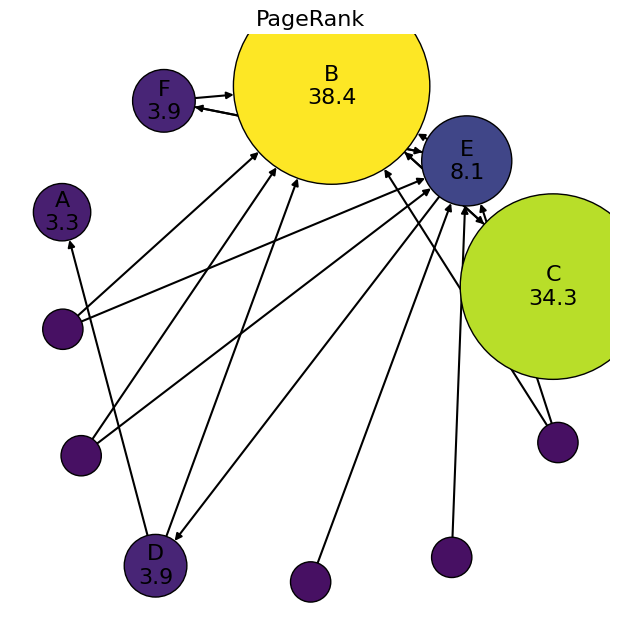

In [ ]:
personalization = None  # Equivalent to {"A": 1 / num_nodes, "B": 1 / num_nodes, ...}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title("PageRank", fontsize=16)
plt.show()

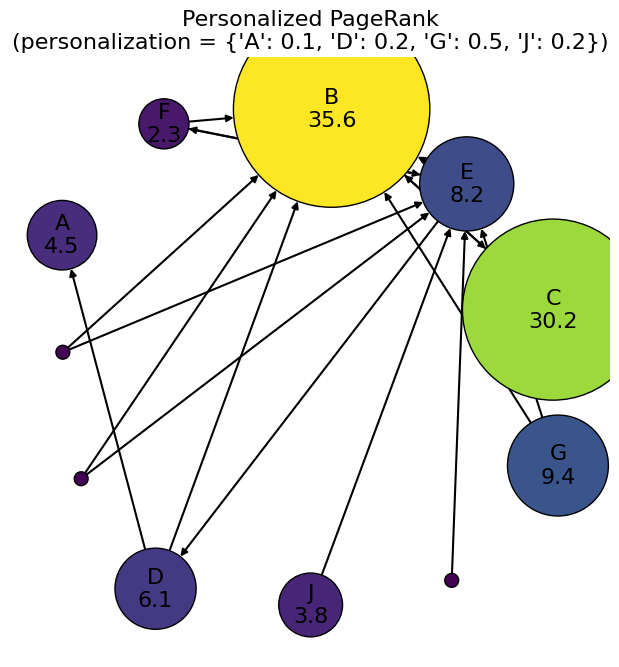

In [ ]:
#personalized page rank
personalization = {"A": 0.1, "D": 0.2, "G": 0.5, "J": 0.2}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title(f"Personalized PageRank\n(personalization = {personalization})", fontsize=16)
plt.show()

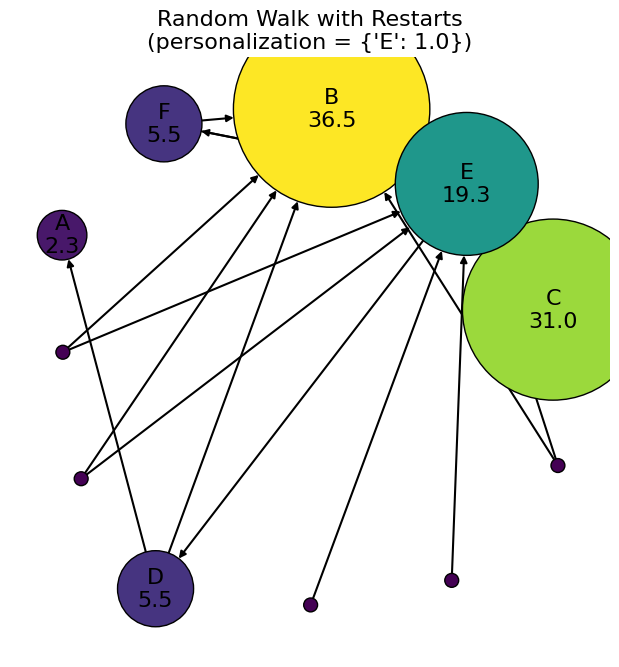

In [ ]:
#Randomwalk with restarts
personalization = {"E": 1.0}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title(f"Random Walk with Restarts\n(personalization = {personalization})", fontsize=16)
plt.show()

In [ ]:
#Modular node embedding
def node_embedding_method_example(
    G: nx.Graph, model: Estimator, n_clusters: int = 4, node_size: int = 500, font_size=16, seed: Optional[int] = 42
) -> None:
    model.fit(G.copy())
    embeddings = model.get_embedding()
    labels = KMeans(n_clusters,random_state=seed).fit_predict(embeddings)

    pos = nx.spring_layout(G, seed=seed)
    cmap = plt.get_cmap("tab10")
    node_colors = [cmap(label) for label in labels]

    nx.draw(G, pos=pos, node_color=node_colors, node_size=node_size, with_labels=True)
    plt.title(
        f"Colored nodes based on clusters identified by K-Means (K={n_clusters})\n on embeddings extracted with "
        f"{type(model).__name__}",
        fontsize=font_size,
    )
#Node2Vec
from karateclub import Node2Vec
node_embedding_method_example(G, Node2Vec(dimensions=16))

#DeepWalk
from karateclub import DeepWalk
node_embedding_method_example(G, DeepWalk(dimensions=16))

#Random_walk is just picking a neighbor at random and moving to it.

#GraphEmbedding
from AnonymousWalkKernel import AnonymousWalks
def get_graph_embedding(G: nx.Graph, num_steps: int = 3) -> np.ndarray:
    embedding = AnonymousWalks(G=G).embed(steps=num_steps, verbose=False)[0]
    return np.asarray(embedding)

In [ ]:
#Using argparser
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description="Run Tuning for Deep encoders")
    parser.add_argument('--dataset', help='Choose the dataset to tune on', required=True, type=str)
    parser.add_argument('--gpu_count', help='Set available GPUs to tune on', required=True, type=int)
    parser.add_argument('--cpu_count', help='Set available CPUs to tune on', required=True, type=int)
    parser.add_argument('--model_name', help='Set model name', required=True, type=str)
    parser.add_argument('--use_norm', help='Use Norm', action='store_true')
    parser.add_argument('--degree_information', help='Augment node degree information', action='store_true')
    parser.add_argument('--identifier', help='Set identifier', required=True, type=str)

    args = parser.parse_args()

    if args.use_norm:
        HyperParameterTuning.CONFIG['use_norm'] = True

    if args.degree_information:
        HyperParameterTuning.AUGMENT_DEGREE_INFORMATION = True

    TuneHelper().tune(args.dataset, args.gpu_count, args.cpu_count, args.model_name, args.identifier)



"""
Usage:
    python3.9 -m project.deep_models.deep_trainer --dataset "karate"
                                                  --gpu_count 0
                                                  --cpu_count 8
                                                  --model_name "gcn"
                                                  --identifier "karate_gcn"
                                                  --degree_information
                                                  --use_norm
"""

In [ ]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html

In [ ]:
#Implementing Node2Vec in pytorch
#2 Steps: Generate Random Walk, Train Embeddings using walks

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import defaultdict
import random


In [ ]:
class Node2Vec(nn.Module):
    def __init__(self, num_nodes, embedding_dim, walk_length, context_size, walks_per_node, p, q):
        super(Node2Vec, self).__init__()
        self.num_nodes = num_nodes
        self.embedding_dim = embedding_dim
        self.walk_length = walk_length
        self.context_size = context_size
        self.walks_per_node = walks_per_node
        self.p = p
        self.q = q

        self.embedding = nn.Embedding(num_nodes, embedding_dim)
        self.context_embedding = nn.Embedding(num_nodes, embedding_dim)

        # Initialize embeddings
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.context_embedding.weight)

    def forward(self, nodes, context):
        node_emb = self.embedding(nodes)
        context_emb = self.context_embedding(context)
        scores = torch.sum(node_emb * context_emb, dim=-1)
        return scores

    def generate_random_walks(self, edge_index):
        adj_list = defaultdict(list)
        for src, dst in edge_index.T:
            adj_list[src.item()].append(dst.item())
            adj_list[dst.item()].append(src.item())

        walks = []
        for _ in range(self.walks_per_node):
            for node in range(self.num_nodes):
                walk = [node]
                for _ in range(self.walk_length - 1):
                    cur = walk[-1]
                    if adj_list[cur]:
                        next_node = random.choice(adj_list[cur])
                        walk.append(next_node)
                    else:
                        break
                walks.append(walk)
        return walks

    def train_embeddings(self, walks, num_negative_samples=1, lr=0.01, epochs=1):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        loss_function = nn.BCEWithLogitsLoss()

        device = self.embedding.weight.device

        for epoch in range(epochs):
            total_loss = 0
            for walk in walks:
                for i, node in enumerate(walk):
                    for j in range(max(0, i - self.context_size), min(len(walk), i + self.context_size + 1)):
                        if i != j:
                            context = walk[j]
                            negative_samples = np.random.choice(self.num_nodes, num_negative_samples)
                            pos_labels = torch.ones(1, device=device)
                            neg_labels = torch.zeros(num_negative_samples, device=device)

                            optimizer.zero_grad()

                            pos_scores = self.forward(torch.tensor([node], device=device), torch.tensor([context], device=device))
                            neg_scores = self.forward(torch.tensor([node], device=device), torch.tensor(negative_samples, device=device))

                            pos_loss = loss_function(pos_scores, pos_labels)  #attends to each node in random walk separately
                            neg_loss = loss_function(neg_scores, neg_labels)

                            loss = pos_loss + neg_loss
                            loss.backward()
                            optimizer.step()

                            total_loss += loss.item()
            print(f'Epoch {epoch+1}, Loss: {total_loss}')
#Node2Vec uses the random walks to embed the nodes. hence nodes occuring frequently in n_random walks, under a certain walk strategy will have similar embedding.


In [ ]:
num_nodes = 10
embedding_dim = 128
walk_length = 5
context_size = 2
walks_per_node = 5
p = 1.0
q = 1.0

edge_index = torch.tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]], dtype=torch.long)
model = Node2Vec(num_nodes, embedding_dim, walk_length, context_size, walks_per_node, p, q)
walks = model.generate_random_walks(edge_index)
model.train_embeddings(walks, epochs=2)  #forward is called within.

#NB: because of the way BCE works, similar nodes will have higher dot product.